# Basic tutorial to learn use skimage

This is the image without changes represented like a matrix

[[0.19577294 0.00666667 0.37764902 ... 0.42480431 0.42480431 0.42480431]
 [0.12322824 0.1954     0.52839294 ... 0.42816039 0.42423882 0.42423882]
 [0.04585961 0.17759373 0.25956235 ... 0.4275949  0.4275949  0.4275949 ]
 ...
 [0.36062667 0.3684698  0.37239137 ... 0.71853294 0.70646275 0.6868549 ]
 [0.36287373 0.35110902 0.34915961 ... 0.75434784 0.70759451 0.70678392]
 [0.35700275 0.34915961 0.34915961 ... 0.6343102  0.70684784 0.73429882]]
(384, 512)
196608





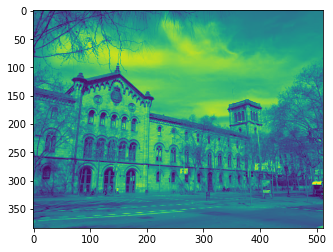

In [67]:
from skimage import io                                   #Import the library skimage

from matplotlib import pyplot as plt                     #Import matplotlib and pyplot to later make plots

img = io.imread("images/ub.jpg", as_gray = True)         #We called our images and put a characteristic in tons grays

#Now, we imported the library of skimage transform and rescale, resize
from skimage.transform import rescale, resize, downscale_local_mean       

#Rescaled the original image
rescaled_img = rescale(img, 1.0/4.0, anti_aliasing = True)
print("This is the image without changes represented like a matrix")
print("")
print(img)
print(img.shape)

print(img.size)
plt.imshow(img)                
print("")
print("")
print("")

In [68]:
if img.ndim == 2:

    channels = 1 #single (grayscale)
    print("This is a single channel")
    # get dimensions of image
    dimensions = img.shape
 
    # height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    #channels = img.shape[2]

    print('Image Dimension    : ',dimensions)
    print('Image Height       : ',height)
    print('Image Width        : ',width)
    print('Number of Channels : ',channels)

if img.ndim == 3:

    channels = img.shape[-1]
    print("This image have 3D ")
    # get dimensions of image
    dimensions = img.shape
 
    # height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]

    print('Image Dimension    : ',dimensions)
    print('Image Height       : ',height)
    print('Image Width        : ',width)
    print('Number of Channels : ',channels)

This is a single channel
Image Dimension    :  (384, 512)
Image Height       :  384
Image Width        :  512
Number of Channels :  1


This is the image rescaled

[[0.29833273 0.42345151 0.38757549 ... 0.43741746 0.43300766 0.42922321]
 [0.35029179 0.35137402 0.42213883 ... 0.45036229 0.44476553 0.44085776]
 [0.39104973 0.41490592 0.43082608 ... 0.45107287 0.44890773 0.44527978]
 ...
 [0.54694332 0.4125944  0.41810032 ... 0.2858153  0.28491262 0.28417794]
 [0.42445394 0.41504232 0.41706328 ... 0.26085869 0.26662605 0.29083803]
 [0.36945553 0.37396374 0.38102753 ... 0.35959915 0.52536496 0.64055334]]
(96, 128)
12288


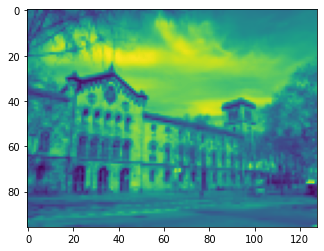

In [31]:
print("This is the image rescaled")
print("")
print(rescaled_img)
print(rescaled_img.shape)
print(rescaled_img.size)
#Now plot the image rescaled
plt.imshow(rescaled_img)

[[0.23306154 0.41325216 0.41453154 ... 0.43224448 0.4296301  0.28511288]
 [0.37442748 0.29250399 0.41439778 ... 0.44519614 0.44258176 0.29374732]
 [0.42321487 0.36530288 0.44171879 ... 0.44883673 0.44622235 0.29617438]
 ...
 [0.58892389 0.45495    0.38401258 ... 0.28499647 0.28499647 0.18999765]
 [0.41270225 0.41466997 0.41567706 ... 0.25914098 0.23785013 0.17816314]
 [0.36704971 0.36817781 0.37040346 ... 0.48072902 0.62967706 0.47169402]]


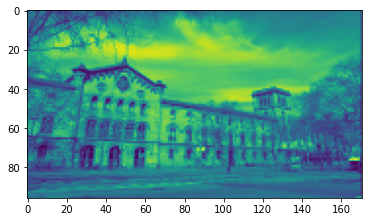

In [25]:
resize_img = resize(img,(200,200))
downscaled_img = downscale_local_mean(img, (4,3))

plt.imshow(downscaled_img)
print(downscaled_img)

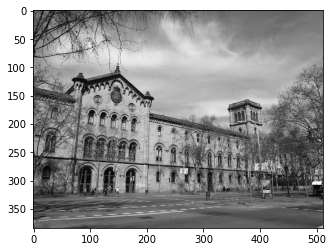

In [36]:

plt.imshow(img, cmap = 'gray')

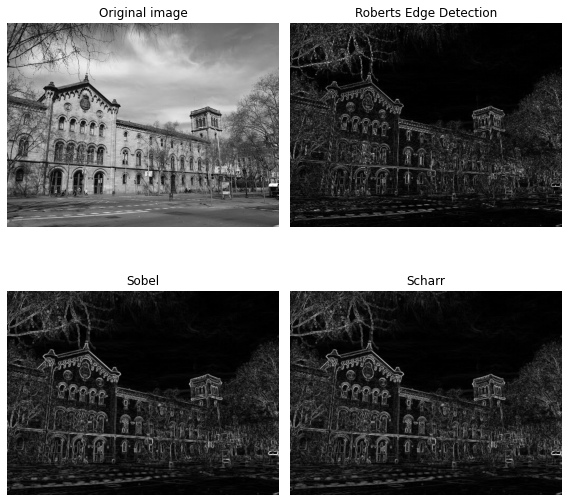

In [54]:
from skimage.filters import roberts, sobel, scharr, prewitt

edge_roberts = roberts(img)
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (8,8))

ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap = plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap = plt.cm.gray)
ax[2].set_title('Sobel')


ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')


for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show()




# A crash course on NumPy for images

Images in scikit-image are represented by NumPy ndarrays. Hence, many common operations can be achieved using standard NumPy methods for manipulating arrays:

In [128]:
from skimage import data
camera = data.camera()
type(camera)

numpy.ndarray

Retrieving the geometry of the image and the number of pixels:

In [129]:
camera.shape


(512, 512)

Retrieving the geometry of the image and the number of pixels:

In [130]:
camera.size

262144

Retrieving statistical information about image intensity values:

In [131]:
camera.min(), camera.max()


(0, 255)

In [132]:
camera.mean()

129.06072616577148

NumPy arrays representing images can be of different integer or float numerical types. See Image data types and what they mean for more information about these types and how scikit-image treats them.

# NumPy indexing

NumPy indexing can be used both for looking at the pixel values and to modify them:




In [133]:
# Get the value of the pixel at the 10th row and 20th column
camera[10,20]

200

In [134]:
#Set to black the pixel at the 3rd row and 10th column
camera[3,10] = 0

Be careful! In NumPy indexing, the first dimension (camera.shape[0]) corresponds to rows, while the second (camera.shape[1]) corresponds to columns, with the origin (camera[0, 0]) at the top-left corner. This matches matrix/linear algebra notation, but is in contrast to Cartesian (x, y) coordinates. See Coordinate conventions below for more details.

Beyond individual pixels, it is possible to access/modify values of whole sets of pixels using the different indexing capabilities of NumPy.

Slicing:

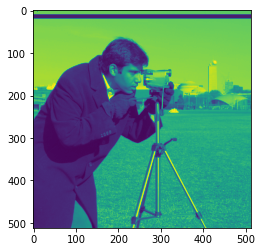

In [140]:
# Set the first ten lines to "black" (0)
camera[10:20] = 20
plt.imshow(camera)

In [141]:
mask = camera < 87

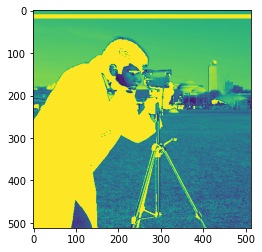

In [143]:
# Set to "white" (255) the pixels where mask is True
camera[mask] = 255
plt.imshow(camera)

Fancy indexing (indexing with sets of indices):

In [147]:
import numpy as np

inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

Masks are very useful when you need to select a set of pixels on which to perform the manipulations. The mask can be any boolean array of the same shape as the image (or a shape broadcastable to the image shape). This can be used to define a region of interest, for example, a disk:

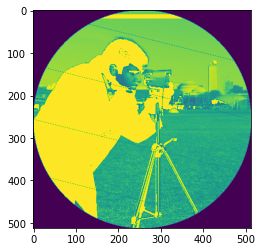

In [153]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 >(nrows / 2)**2)
camera[outer_disk_mask] = 0

plt.imshow(camera)